In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kstest
from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Data Acquisition

In [ ]:
df = pd.read_csv('ev_sales.csv')
df.head()

Exploratory Data Analysis

In [239]:
df['brand'].value_counts().head(10)

brand
Mercedes-Benz    42
Audi             28
Porsche          26
Volkswagen       23
Ford             22
BMW              20
Peugeot          19
Volvo            18
BYD              17
Smart            17
Name: count, dtype: int64

We have 42 Mercedes-Benz vehicles which is the most in our dataset, with 19 SUVs, 14 sedans and 9 small passenger vans. There are 22 vehicles with 210 km/h as top speed(10 SUVs and 12 sedans). There is one SUV with a top speed of 240 km/h, 1 sedan each with 220 km/h and 250 km/h. There are 13 SUVs and 9 sedans with AWD, 3 SUVs and 5 sedans with RWD and 3 SUVs and 9 vans with FWD.

In [241]:
# retrieve all the rows with the brand as Mercedes-Benz
mb = df[df['brand']=='Mercedes-Benz']

In [242]:
mb['car_body_type'].value_counts()

car_body_type
SUV                    19
Sedan                  14
Small Passenger Van     9
Name: count, dtype: int64

In [ ]:
mb.groupby('car_body_type')['top_speed_kmh'].value_counts()

car_body_type        top_speed_kmh
SUV                  210              10
                     160               7
                     180               1
                     240               1
Sedan                210              12
                     220               1
                     250               1
Small Passenger Van  160               6
                     132               2
                     140               1
Name: count, dtype: int64

In [249]:
mb.groupby('car_body_type')['drivetrain'].value_counts()

car_body_type        drivetrain
SUV                  AWD           13
                     FWD            3
                     RWD            3
Sedan                AWD            9
                     RWD            5
Small Passenger Van  FWD            9
Name: count, dtype: int64

In [250]:
colors=["#CA25A6", '#33FF57',"#7A1BC7", '#3357FF', '#F0F033', "#33FFFF",  "#41647A", "#193F3C"]

Data Analysis

Summarise the dataset

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [252]:
df.describe()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


Feature Selection

In [253]:
feature=['brand', 'model', 'range_km', 'battery_capacity_kWh', 'fast_charging_power_kw_dc', 'car_body_type','top_speed_kmh', 'acceleration_0_100_s', 'number_of_cells', 'seats', 'efficiency_wh_per_km', 'torque_nm']
ev_df= df[feature]

In [254]:
ev_df.head()

,brand,model,range_km,battery_capacity_kWh,fast_charging_power_kw_dc,car_body_type,top_speed_kmh,acceleration_0_100_s,number_of_cells,seats,efficiency_wh_per_km,torque_nm
0,Abarth,500e Convertible,225,37.8,67.0,Hatchback,155,7.0,192.0,4,156,235.0
1,Abarth,500e Hatchback,225,37.8,67.0,Hatchback,155,7.0,192.0,4,149,235.0
2,Abarth,600e Scorpionissima,280,50.8,79.0,SUV,200,5.9,102.0,5,158,345.0
3,Abarth,600e Turismo,280,50.8,79.0,SUV,200,6.2,102.0,5,158,345.0
4,Aiways,U5,315,60.0,78.0,SUV,150,7.5,NaN,5,156,310.0


In [255]:
ev_df.isnull().sum()

brand                          0
model                          1
range_km                       0
battery_capacity_kWh           0
fast_charging_power_kw_dc      1
car_body_type                  0
top_speed_kmh                  0
acceleration_0_100_s           0
number_of_cells              202
seats                          0
efficiency_wh_per_km           0
torque_nm                      7
dtype: int64

Top 10 high speed vehicles

In [256]:
top_10_speed=ev_df.groupby('brand')['top_speed_kmh'].mean().sort_values(ascending=False).head(10)
top_10_speed

brand
Maserati       278.333333
Lotus          252.666667
Rolls-Royce    250.000000
Porsche        246.730769
Lucid          240.000000
Tesla          228.363636
Genesis        216.000000
Cadillac       210.000000
Audi           208.928571
BMW            206.300000
Name: top_speed_kmh, dtype: float64

Maserati-s are the fastest brand with an average speed of 278.33 km/h, followed by Lotus with a vast difference of 26 km/h with 252.66 km/h

Top 10 brands with high efficiency

In [259]:
top_10_efficiency=ev_df.groupby('brand')['efficiency_wh_per_km'].mean().sort_values(ascending=True).head(10)
top_10_efficiency

brand
Dacia       111.500000
Fiat        120.125000
Lancia      122.000000
firefly     125.000000
Dongfeng    127.500000
Mini        134.625000
DS          136.200000
Mazda       137.000000
Renault     137.636364
Tesla       138.272727
Name: efficiency_wh_per_km, dtype: float64

The brand Dacia are the most efficient as it takes 111 Wh/km, i.e., how much energy the vehicle uses to travel 1 km. And so, low value is more efficient compared to high values.

Top 10 highest-range vehicles

In [260]:
top_10_range=ev_df.groupby('brand')['range_km'].mean().sort_values(ascending=False).head(10)
top_10_range

brand
Lucid          603.333333
Porsche        502.884615
Tesla          490.000000
Lotus          489.166667
Voyah          480.000000
Audi           478.392857
Polestar       478.333333
Rolls-Royce    465.000000
Cadillac       460.000000
BMW            458.250000
Name: range_km, dtype: float64

Lucid vehicles has the highest driving range with 603.33 km on a full charge, ie., it can travel upto 603 km before the next recharge under ideal or test conditions.

In [261]:
# Normalize each column to 0-1 scale for comparison (min-max scaling)
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

In [262]:
norm_range= min_max_scale(top_10_range)
norm_efficiency= min_max_scale(top_10_efficiency)
norm_speed= min_max_scale(top_10_speed)

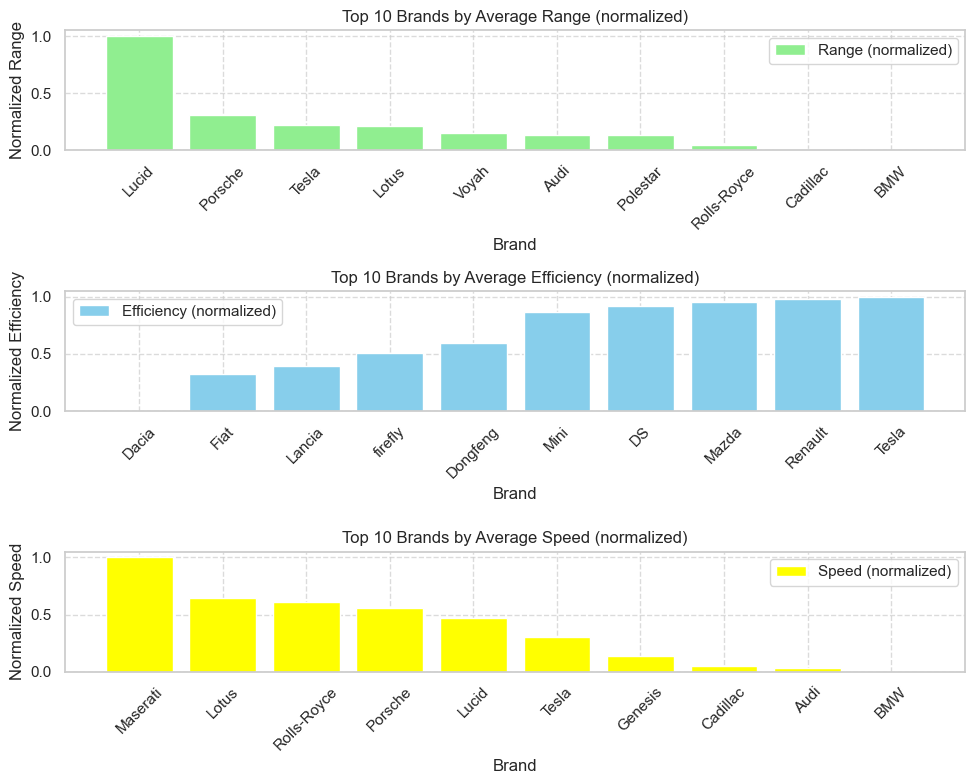

In [263]:
# Plot stacked bar chart
fig, ax = plt.subplots(3,1,figsize=(10,8))
#Plot the normalized values
ax[0].bar(norm_range.index, norm_range.values, label='Range (normalized)',color='lightgreen')
ax[1].bar(norm_efficiency.index, norm_efficiency.values, label='Efficiency (normalized)',color='skyblue')
ax[2].bar(norm_speed.index, norm_speed.values, label='Speed (normalized)',color='yellow')
#Set the title
ax[0].set_title('Top 10 Brands by Average Range (normalized)')
ax[1].set_title('Top 10 Brands by Average Efficiency (normalized)')
ax[2].set_title('Top 10 Brands by Average Speed (normalized)')

#Set the x labels
ax[0].set_xlabel('Brand')
ax[1].set_xlabel('Brand')
ax[2].set_xlabel('Brand')

#set the y labels
ax[0].set_ylabel('Normalized Range')
ax[1].set_ylabel('Normalized Efficiency')
ax[2].set_ylabel('Normalized Speed')

# Rotate x-ticks for better readability
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
ax[2].tick_params(axis='x', rotation=45)

# Add grid for better readability
ax[0].grid(linestyle='--', alpha=0.7)
ax[1].grid(linestyle='--', alpha=0.7)
ax[2].grid(linestyle='--', alpha=0.7)

# Add a legend to each subplot
ax[0].legend()
ax[1].legend()
ax[2].legend()

#Display the plot
plt.tight_layout()
plt.show()

Distribution of Top Speed in km/h

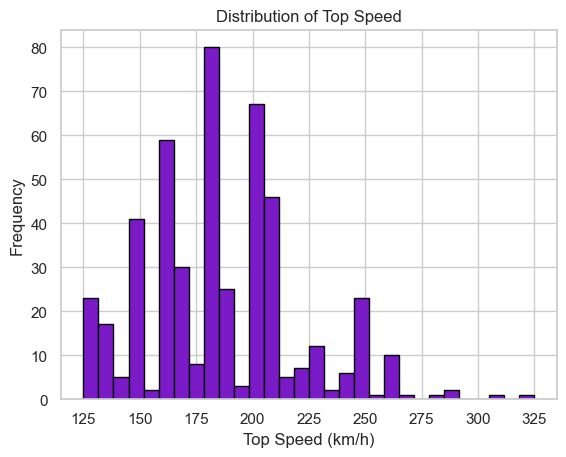

In [264]:
ev_df['top_speed_kmh'].hist(bins=30, color="#7A1BC7", edgecolor='black')
plt.title('Distribution of Top Speed')
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

Car Body Types Frequency Distribution

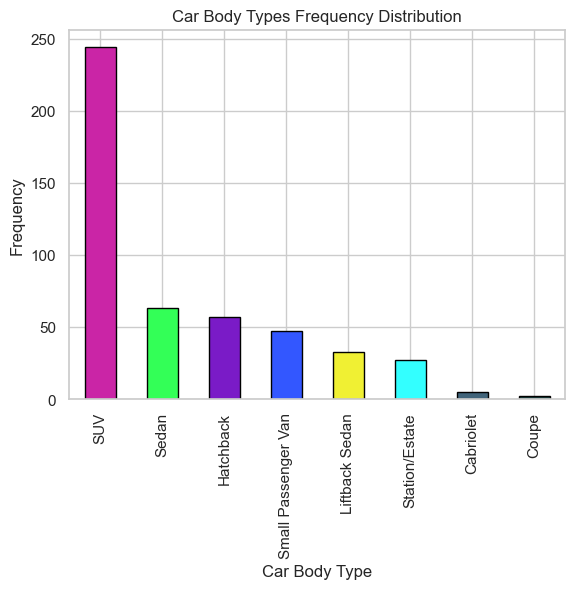

In [265]:
ev_df['car_body_type'].value_counts().plot(kind='bar', color=colors, edgecolor='black')
plt.title('Car Body Types Frequency Distribution')
plt.xlabel('Car Body Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [266]:
df.groupby('brand')['car_body_type'].value_counts().sort_values(ascending=False).head(10)

brand          car_body_type 
Mercedes-Benz  SUV               19
Smart          SUV               17
Audi           SUV               16
Volvo          SUV               15
Mercedes-Benz  Sedan             14
Ford           SUV               14
Kia            SUV               12
Skoda          SUV               12
Porsche        Station/Estate    11
               Sedan             11
Name: count, dtype: int64

In [267]:
sedan_ev=ev_df[ev_df['car_body_type'] == 'Sedan']
suv_ev=ev_df[ev_df['car_body_type'] == 'SUV']
hatchback_ev=ev_df[ev_df['car_body_type'] == 'Hatchback']

In [268]:
sedan_ev['brand'].value_counts()

brand
Mercedes-Benz    14
Porsche          11
BMW               6
NIO               4
Tesla             4
Audi              4
Hyundai           3
Lucid             3
GWM               3
BYD               3
XPENG             3
Citroen           2
Kia               2
Genesis           1
Name: count, dtype: int64

In [269]:
suv_ev['brand'].value_counts()

brand
Mercedes-Benz    19
Smart            17
Audi             16
Volvo            15
Ford             14
Kia              12
Skoda            12
Hyundai          11
Peugeot           9
BYD               8
Volkswagen        7
BMW               7
NIO               6
Zeekr             6
XPENG             6
Mini              5
Tesla             5
Renault           4
Opel              4
Genesis           4
DS                4
MG                4
Porsche           4
Nissan            4
Lexus             3
Polestar          3
Hongqi            3
Lotus             3
Abarth            2
VinFast           2
CUPRA             2
Aiways            2
Alfa              2
Jeep              2
Toyota            2
Skywell           2
Honda             1
Cadillac          1
Fiat              1
Elaris            1
Citroen           1
Omoda             1
Maserati          1
Leapmotor         1
Lynk&Co           1
KGM               1
Jaguar            1
Subaru            1
Voyah             1
Name: count, d

In [270]:
hatchback_ev['brand'].value_counts()

brand
BYD           6
Renault       5
Volkswagen    5
Fiat          5
MG            4
Opel          3
CUPRA         3
Citroen       3
Mini          3
Peugeot       3
GWM           3
Alpine        2
Abarth        2
Dacia         2
Dongfeng      2
Kia           2
Lancia        1
DS            1
Leapmotor     1
firefly       1
Name: count, dtype: int64

The Hypothesis Test Would Be:

Null Hypothesis (H₀): There is no correlation between battery_capacity_kWh and range_km.

Alternative Hypothesis (H₁): There is a significant positive correlation between battery_capacity_kWh and range_km.

In [271]:
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

the battery capacity and the range variables doesn't have any null values.

see if they are normally distributed

p > 0.05 → Data is likely normal

p ≤ 0.05 → Data is not normal

In [272]:

stat, p = kstest(df['battery_capacity_kWh'], 'norm', args=(df['battery_capacity_kWh'].mean(), df['battery_capacity_kWh'].std()))
print(f"KS test p-value: {p:.4f}")

KS test p-value: 0.0072


In [273]:
stat, p = kstest(df['range_km'], 'norm', args=(df['range_km'].mean(), df['range_km'].std()))
print(f"KS test p-value: {p:.4f}")

KS test p-value: 0.0065


In [274]:
#  Calculate the Pearson correlation
corr_coef, p_value = pearsonr(df['battery_capacity_kWh'], df['range_km'])

print(f"Pearson Correlation Coefficient: {corr_coef:.2f}")
print(f"P-Value: {p_value:.2e}")

Pearson Correlation Coefficient: 0.88
P-Value: 2.31e-156


Interpretation:

🔋 There's a very strong positive correlation between battery capacity and range. 
📉 The p-value is far below 0.05, so we reject the null hypothesis.

Conclusion:
As battery capacity (in kWh) increases, the driving range (in km) increases significantly — which makes intuitive sense and is statistically supported.

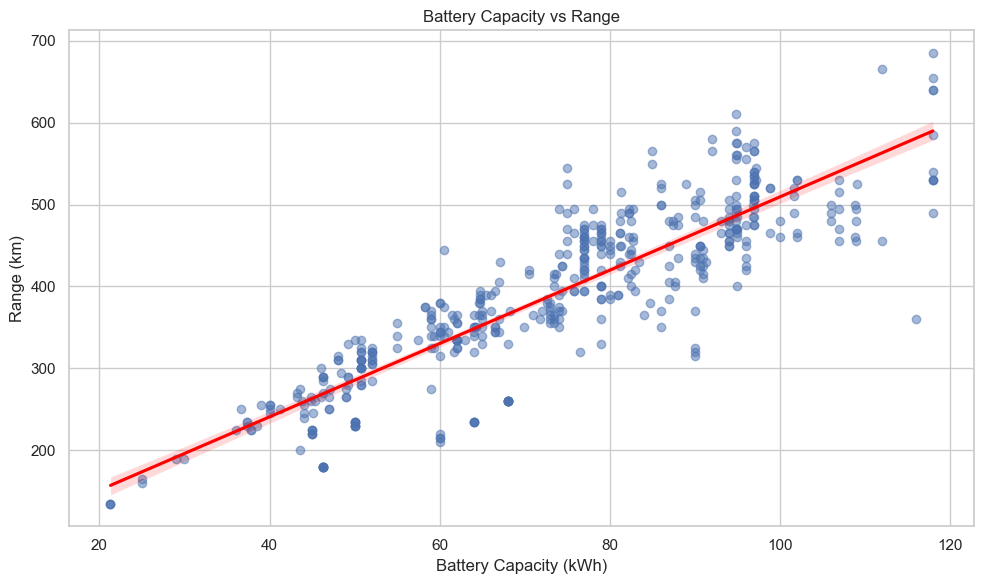

In [275]:
# Step 3: Plot the scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='battery_capacity_kWh', y='range_km', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
#plt.scatter(df['battery_capacity_kWh'], df['range_km'], alpha=0.5, color='blue', label='Data Points')
plt.title('Battery Capacity vs Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.grid(True)
#plt.legend()
plt.tight_layout()
plt.show()

Output:
You'll get the correlation coefficient and p-value in the console.

The plot will show a regression line indicating the linear relationship.

Are SUVs faster compared to hatchbacks?

In [276]:
hatchback_speed_mean = hatchback_ev['top_speed_kmh'].mean()
suv_speed_mean = suv_ev['top_speed_kmh'].mean()
sedan_speed_mean = sedan_ev['top_speed_kmh'].mean()
print(f"Hatchback Average Speed: {hatchback_speed_mean:.2f} km/h")
print(f"SUV Average Speed: {suv_speed_mean:.2f} km/h")
print(f"Sedan Average Speed: {sedan_speed_mean:.2f} km/h")


Hatchback Average Speed: 156.61 km/h
SUV Average Speed: 186.37 km/h
Sedan Average Speed: 215.92 km/h


Based on the values, the SUVs are faster when compared to hatchbacks. However, surprisingly, the electric sedans are faster than electric SUVs, unlike the conventional vehicles.

Does top speed correlate strongly with acceleration?

In [277]:
speed_corr = p_value = pearsonr(df['top_speed_kmh'], df['acceleration_0_100_s'])

print(f"Pearson Correlation Coefficient: {speed_corr[0]:.2f}")
print(f"P-Value: {speed_corr[1]:.2e}")

Pearson Correlation Coefficient: -0.82
P-Value: 3.15e-119


Looking at the values, they are inversely correlated. That is, the vehicles that has the highest top speeds, takes less time to reach 100 km/h from standstill. And vice versa.

K-Means Clustering based on range_km, battery_capacity_kWh, efficiency_wh_per_km, acceleration_0_100_s

In [278]:
attr=['range_km','battery_capacity_kWh','efficiency_wh_per_km','acceleration_0_100_s','top_speed_kmh','torque_nm']
X=df[attr].dropna()

scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [279]:
# Apply kmeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_scaled)

from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.31


Best number of clusters: 2 with a silhouette score of 0.41


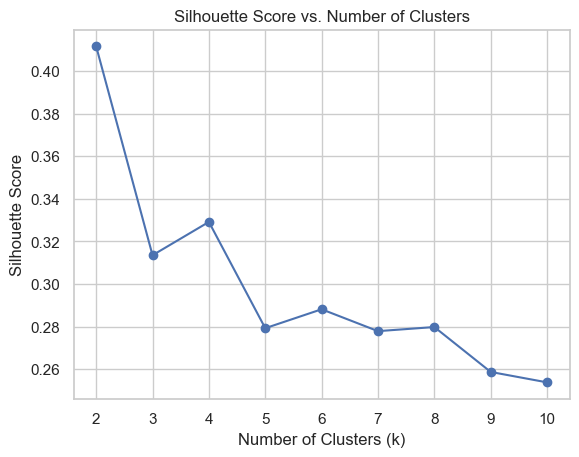

In [280]:
scores = []
models = []

ks = range(2, 11)

for k in ks:
    model = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)
    models.append(model)

#get the model with the highest silhouette score
best_k = ks[scores.index(max(scores))]
print(f"Best number of clusters: {best_k} with a silhouette score of {max(scores):.2f}")

# Plot
plt.plot(ks, scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


best_model=models[scores.index(max(scores))]
# Add the cluster labels back to your data
X['cluster'] = best_model.labels_
X['cluster'] = X['cluster'].astype(str)

Interpretation: Best k = 2 (Silhouette ~ 0.40)
A silhouette score over 0.40 indicates moderately distinct clusters.

Since this is the peak value, and scores drop afterward, it means the structure in your EV data is best explained by just 2 major groups.


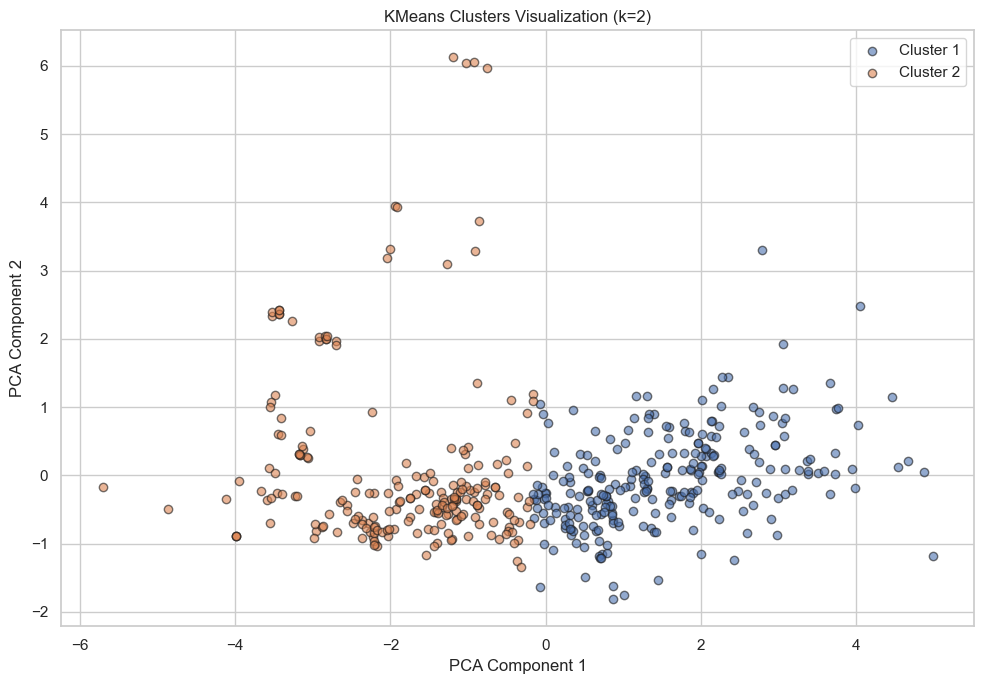

In [281]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
labels = best_model.predict(X_scaled)
n_clusters = best_model.n_clusters

plt.figure(figsize=(10, 7))
for i in range(n_clusters):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}', alpha=0.6, edgecolor='k')

plt.title(f'KMeans Clusters Visualization (k={n_clusters})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**The data probably separates into two broad categories, such as:**

*High-performance or premium EVs*

->Large battery

->high range

->fast acceleration

->higher speed

*Economy or practical EVs*

->Smaller battery

->more efficient

->lower top speed

->slower acceleration

To validate this, let's analyze feature averages for each cluster.

In [282]:
# feature average of each cluster
cluster_means = pd.DataFrame(X_scaled, columns=attr).groupby(labels).mean()
print("Cluster Means:")
print(cluster_means)

Cluster Means:
   range_km  battery_capacity_kWh  efficiency_wh_per_km  acceleration_0_100_s  \
0  0.701070              0.707700              0.160815             -0.656405   
1 -0.841939             -0.849901             -0.193129              0.788300   

   top_speed_kmh  torque_nm  
0       0.652263   0.698419  
1      -0.783326  -0.838756  


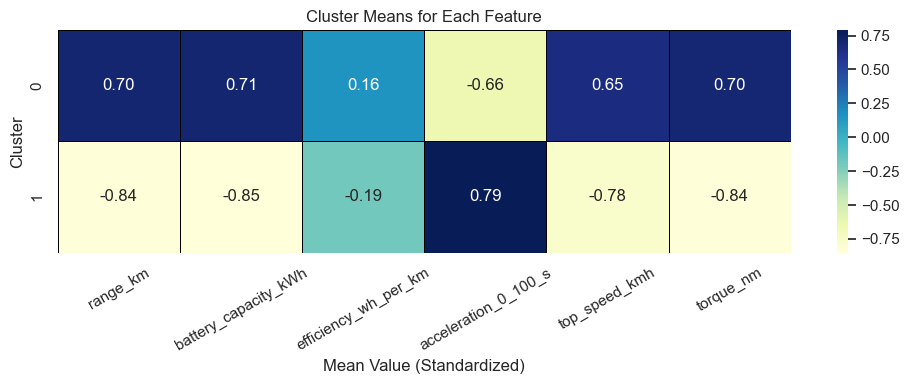

In [283]:
#plot cluster means
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, linecolor='black',cbar=True)
plt.title('Cluster Means for Each Feature')
plt.ylabel('Cluster')
plt.xlabel('Mean Value (Standardized)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()